In [31]:
import numpy as np
from hmmlearn import hmm

In [32]:
np.random.seed(42)

model = hmm.GaussianHMM(n_components=3, n_iter=100, init_params="mcs")
model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = np.array([[0.7, 0.2, 0.1],
                             [0.3, 0.5, 0.2],
                             [0.3, 0.3, 0.4]])
model.means_ = np.array([[0.0, 0.0], [3.0, -3.0], [5.0, 10.0]])
model.covars_ = np.tile(np.identity(2), (3, 1, 1))
X, Z = model.sample(100)

ValueError: 'diag' covars must have shape (n_components, n_dim)

In [33]:
lr = hmm.GaussianHMM(n_components=3, covariance_type="diag",
                      init_params="cm", params="cmt")
lr.startprob_ = np.array([1.0, 0.0, 0.0])
lr.transmat_ = np.array([[0.5, 0.5, 0.0],
                         [0.0, 0.5, 0.5],
                         [0.0, 0.0, 1.0]])

In [34]:
model = hmm.GaussianHMM(n_components=3)
X, Z = model.sample(100)

NotFittedError: This GaussianHMM instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [35]:
X, Z = model.sample(100)

NotFittedError: This GaussianHMM instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

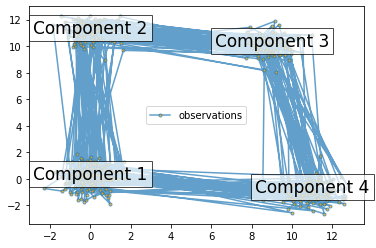

In [36]:
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

startprob = np.array([0.6, 0.3, 0.1, 0.0])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars

# Generate samples
X, Z = model.sample(500)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

In [37]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# create state space and initial state probabilities

states = ['Ćwiczenie 1', 'Ćwiczenie 2','Ćwiczenie 3','Ćwiczenie 4','Ćwiczenie 5',]
pi = [0.2, 0.2, 0.2, 0.2, 0.2]
state_space = pd.Series(pi, index=states, name='states')
print(state_space)
print(state_space.sum())

Ćwiczenie 1    0.2
Ćwiczenie 2    0.2
Ćwiczenie 3    0.2
Ćwiczenie 4    0.2
Ćwiczenie 5    0.2
Name: states, dtype: float64
1.0


In [38]:
from pomegranate import *
model = HiddenMarkovModel()

In [39]:
from pomegranate import *
d1 = DiscreteDistribution({'A' : 0.35, 'C' : 0.20, 'G' : 0.05, 'T' : 0.40})
d2 = DiscreteDistribution({'A' : 0.25, 'C' : 0.25, 'G' : 0.25, 'T' : 0.25})
d3 = DiscreteDistribution({'A' : 0.10, 'C' : 0.40, 'G' : 0.40, 'T' : 0.10})

s1 = State(d1, name="s1")
s2 = State(d2, name="s2")
s3 = State(d3, name="s3")

model = HiddenMarkovModel('example')
model.add_states([s1, s2, s3])
model.add_transition(model.start, s1, 0.90)
model.add_transition(model.start, s2, 0.10)
model.add_transition(s1, s1, 0.80)
model.add_transition(s1, s2, 0.20)
model.add_transition(s2, s2, 0.90)
model.add_transition(s2, s3, 0.10)
model.add_transition(s3, s3, 0.70)
model.add_transition(s3, model.end, 0.30)
model.bake()

print(model.log_probability(list('ACGACTTCGAT')))

-19.943629656033988


In [40]:
print(", ".join(state.name for i, state in model.viterbi(list('ACGACTATTCGAT'))[1]))


example-start, s1, s2, s2, s2, s2, s2, s2, s2, s2, s2, s2, s2, s3, example-end
